# Laboratory Session 4

## Exercise 1 - Six Boxes Toy Model : inference
Write an R program that:
1) allows the user to insert the color of a randomly extracted box and

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

Black is 0, white is 1
The a priori probability of having chosen any of the boxes is $1/\text{#boxes} = 1/6$.

We want to calculate the posterior, given an extraction $E_i$, that the box $H_j$ was the source:
$$
p(H_j|E_i) = \frac{p(E_i|H_j)p(H_j)}{p(E_i)}
$$

Since $H_j$ has $j$ white balls, and 5 balls in total, the likelihood of extracting a white ball for each box is $j/5$. The probability $p(E_i)$ of extracting a white ball can be obtained from the marginal probability:
$$p(E_i) = \sum_j p(E_i,H_j)\\
= \sum_j p(E_i|H_j)p(H_j)$$ because of the product rule for probabilities.


$$
\begin{align}
p(H_j,E_1,E_2) &= p(H_j,E_1|E_2)p(E_2)=p(H_j|E_1,E_2)p(E_1)p(E_2)\\
&=p(E_1,E_2|H_j)p(H_j)=p(E_1|H_j)p(E_2|H_j)p(H_j)\\
\implies p(H_j|E_1,E_2)&=\frac{p(E_1|H_j)p(E_2|H_j)p(H_j)}{p(E_1)p(E_2)}\\
\therefore p(H_j|n)&=\frac{p(E_n|H_j)}{p(E_n)}p(H_j|n-1)
\end{align}
$$

In [1]:
six_boxes <- function(extractions){

    n_boxes <- 6
    box_size <- n_boxes-1
    # The prior is the same for each box
    p_box <- 1/n_boxes

    p_w <- sum(0:box_size)*p_box/box_size
    p_b <- 1 - p_w
    # with the assumption for the balls distribution
    
    prior <- p_box
    posteriors <- matrix(rep(prior,n_boxes*(length(extractions)+1)),c(length(extractions)+1,n_boxes))
    for(i in 1:length(extractions)){
        ex <- extractions[i]
        priors <- posteriors[i,]
        lhoods <- 1*ex+(-1)**ex*box_size:0/box_size
        almost_posts <- lhoods*priors
        evidence <- sum(almost_posts)
        posts <- almost_posts/evidence
        posteriors[i+1,] <- posts
    }
    
    for(j in 1:n_boxes){
        plot(0:length(extractions),posteriors[,j], main = j-1)
    }
}

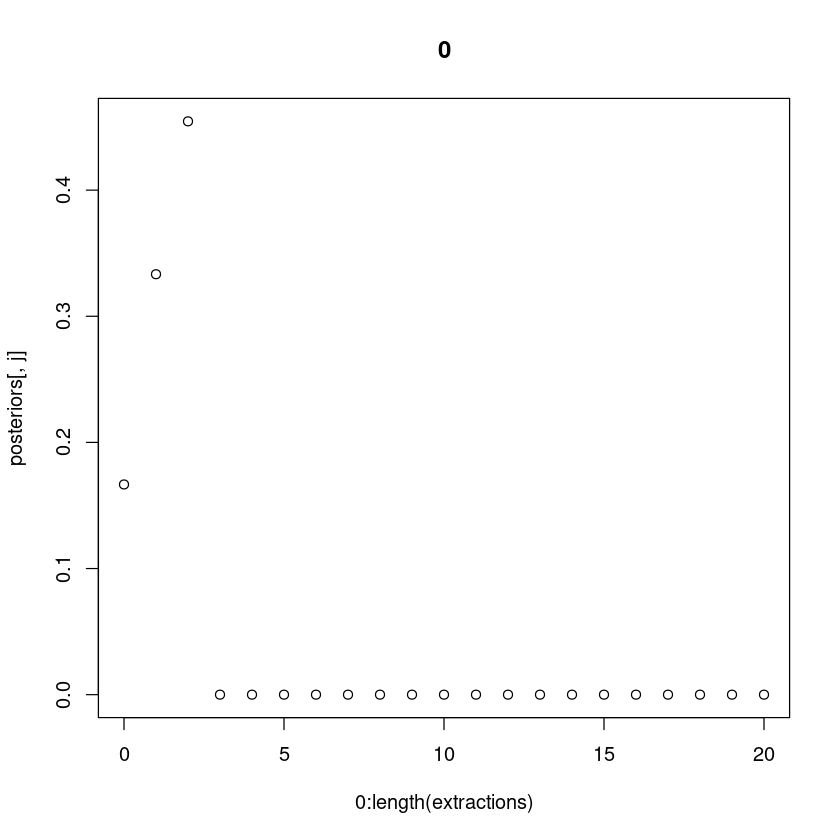

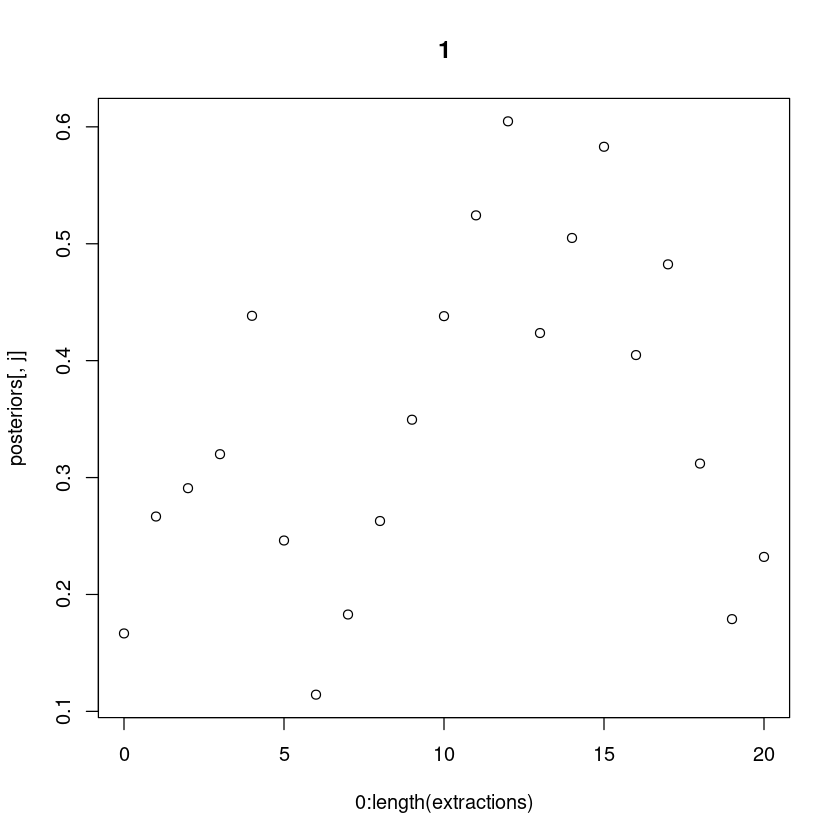

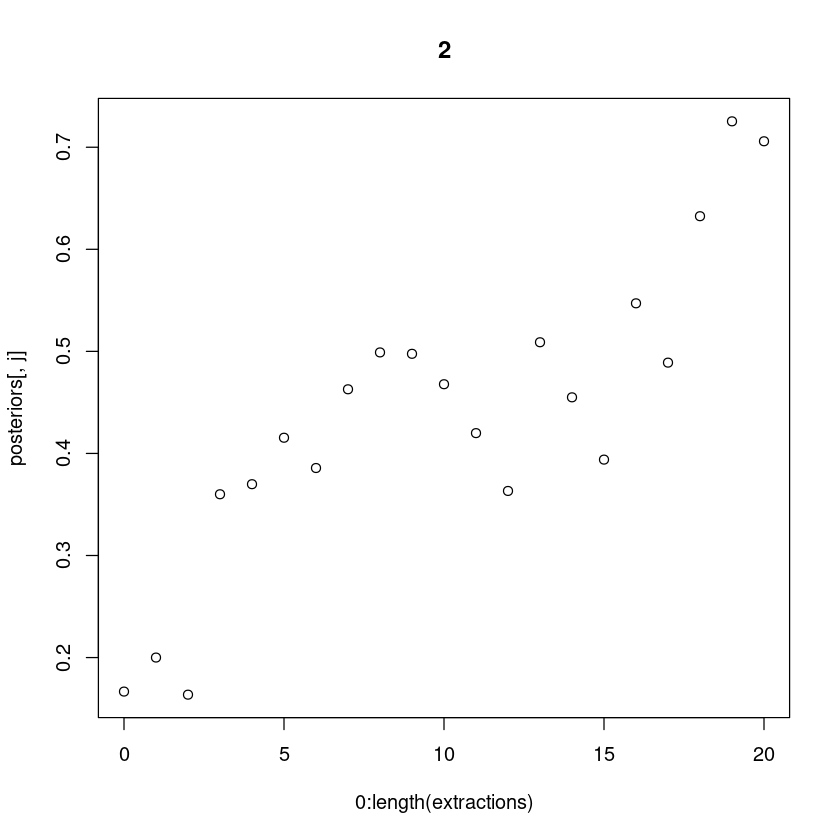

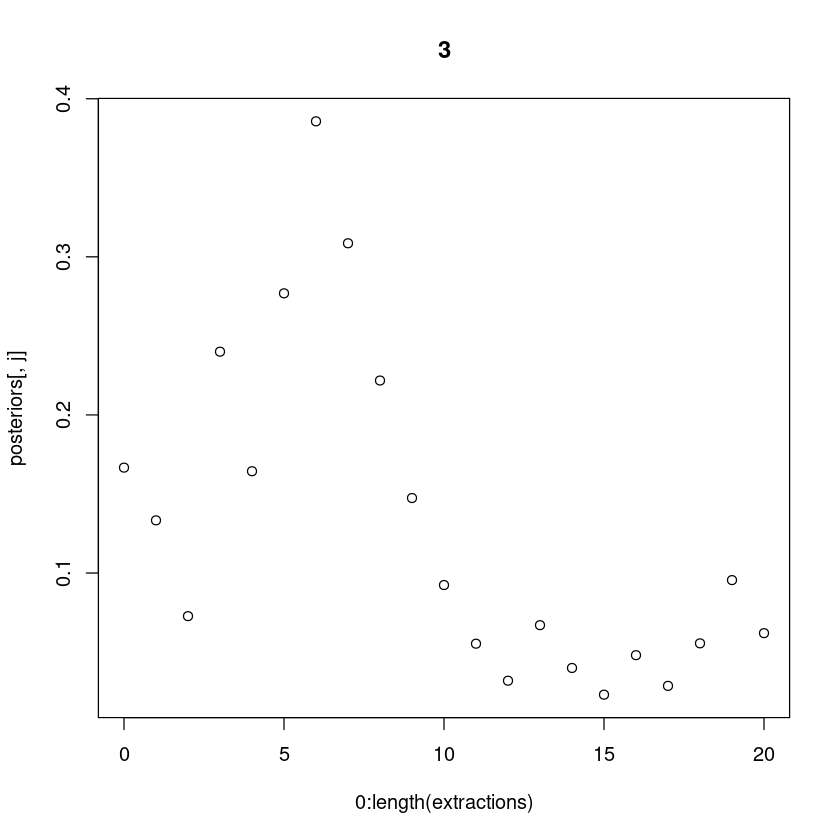

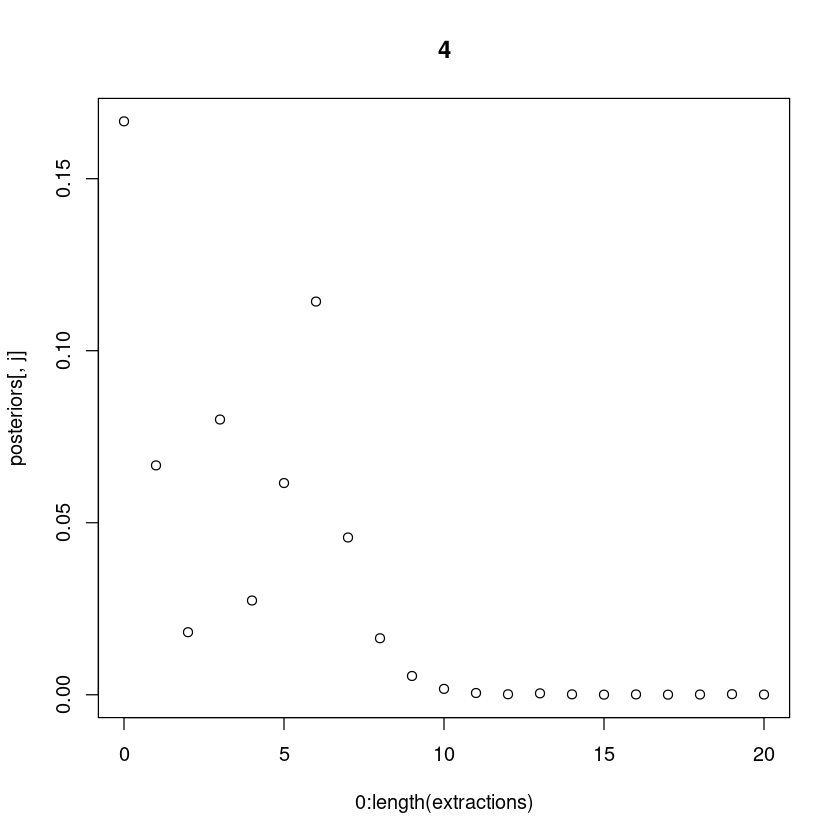

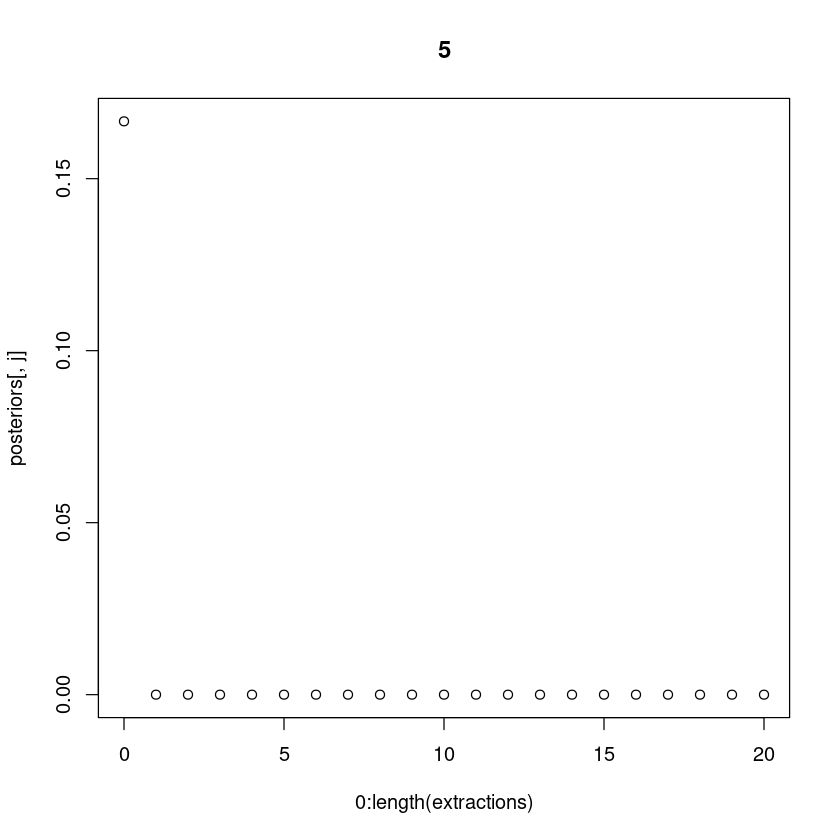

In [2]:
extraction <- sample(c(0,0,0,1,1),20,replace=TRUE)
six_boxes(extraction)

## Exercise 3
- An important property of the gamma distribution is the so-called _reproductive property_
- given a sequence of independent random variable $X_j ∼ \text{Gamma}(\alpha_j, \beta)$, it follows that
$$
\begin{align}
Y=\sum_j X_j\to Y ~ \text{Gamma}(\alpha,\beta), \alpha = \sum_j \alpha_j
\end{align}
$$
if $\alpha = m$ is an integer, a random variable from gamma distribution $\text{Gamma}(m, \beta)$ (also known as Erlang distribution) can be obtained by summing m independent exponential
random variables $X_j ∼ \text{Exp}(\beta)$:
$$
\begin{align}
Y=\beta\sum_j(-\ln U_j)=-\beta\ln\prod_j U_j
\end{align}
$$

Write an algorithm to sample variables from an Erlang distribution $\text{Gamma}(m, \beta)$

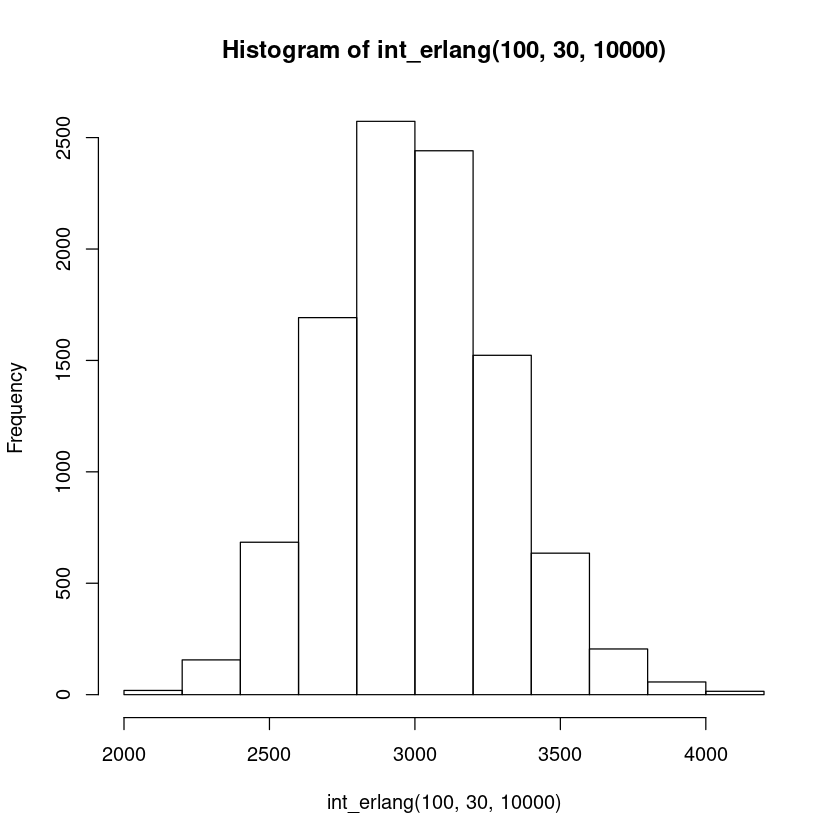

In [3]:
# TODO: too slow, not even properly distributed
int_erlang <- function(m,bet,N) replicate(N,-bet*log(prod(runif(m))))
hist(int_erlang(100,30,10000))

## Exercise 4
One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.

Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

In [4]:
mid_sq_alg <- function(input){
    in_digits <- length(unlist(strsplit(as.character(input),"")))
    number <- unlist(strsplit(as.character(input**2),""))
    sq_digits <- length(number)
    i <- 2
    # If the current start digit of the squared number is zero,
    # we review whether there would be enough digits left to trim if we started from the next digit.
    # We are trying to get a number with the same number of digits as the input, not more, not less.
    while(number[i]=='0' & in_digits+i<sq_digits){
        i <- i+1
    }
    new_number <- number[i:(in_digits+i-1)]
    new_number <- as.numeric(paste(new_number, collapse=""))
    return(new_number)
}

mid_sq_alg(123098)

[1] 515311